# Libraries

In [197]:
options(warn=-1)
library(dplyr)
library(DataExplorer)
library(ggplot2)
library(tidyr)
library(patchwork)
library(cowplot)

# Introduction

## Problem description

## Data description

In [198]:
adult_data <- read.csv(file="data\\adult.data", stringsAsFactors = TRUE, 
                       col.names=c("age", "workclass", "fnlwgt", "education", 
                                   "education.num","marital.status", "occupation", "relationship", "race","sex",
                                   "capital.gain", "capital.loss", "hours.per.week","native.country", "income"))

In [199]:
head(adult_data)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


# Descriptive analysis and data visualization

## Basic characteristics

In [200]:
adult_data <- subset(adult_data, select = -education.num)

In [201]:
str(adult_data)

'data.frame':	32560 obs. of  14 variables:
 $ age           : int  50 38 53 28 37 49 52 31 42 37 ...
 $ workclass     : Factor w/ 9 levels " ?"," Federal-gov",..: 7 5 5 5 5 5 7 5 5 5 ...
 $ fnlwgt        : int  83311 215646 234721 338409 284582 160187 209642 45781 159449 280464 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 12 2 10 13 7 12 13 10 16 ...
 $ marital.status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 3 1 3 3 3 4 3 5 3 3 ...
 $ occupation    : Factor w/ 15 levels " ?"," Adm-clerical",..: 5 7 7 11 5 9 5 11 5 5 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 1 2 1 6 6 2 1 2 1 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 3 3 5 3 5 5 5 3 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 1 1 1 2 1 2 2 ...
 $ capital.gain  : int  0 0 0 0 0 0 0 14084 5178 0 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  13 40 40 40 40 16 45 50 40 80 ...
 $ native.cou

In [202]:
num_unique_values <- sapply(adult_data, function(x) length(unique(x)))

for (i in 1:length(num_unique_values)) {
  print(paste0(names(num_unique_values)[i], ": ", num_unique_values[i]))
}

[1] "age: 73"
[1] "workclass: 9"
[1] "fnlwgt: 21647"
[1] "education: 16"
[1] "marital.status: 7"
[1] "occupation: 15"
[1] "relationship: 6"
[1] "race: 5"
[1] "sex: 2"
[1] "capital.gain: 119"
[1] "capital.loss: 92"
[1] "hours.per.week: 94"
[1] "native.country: 42"
[1] "income: 2"


In [203]:
numerical_columns <- names(adult_data[sapply(adult_data, is.numeric)])
factor_columns <- names(adult_data[sapply(adult_data, is.factor)])

In [204]:
summary(adult_data[factor_columns])

             workclass             education                    marital.status 
  Private         :22696    HS-grad     :10501    Divorced             : 4443  
  Self-emp-not-inc: 2541    Some-college: 7291    Married-AF-spouse    :   23  
  Local-gov       : 2093    Bachelors   : 5354    Married-civ-spouse   :14976  
  ?               : 1836    Masters     : 1723    Married-spouse-absent:  418  
  State-gov       : 1297    Assoc-voc   : 1382    Never-married        :10682  
  Self-emp-inc    : 1116    11th        : 1175    Separated            : 1025  
 (Other)          :  981   (Other)      : 5134    Widowed              :  993  
            occupation            relationship                    race      
  Prof-specialty :4140    Husband       :13193    Amer-Indian-Eskimo:  311  
  Craft-repair   :4099    Not-in-family : 8304    Asian-Pac-Islander: 1039  
  Exec-managerial:4066    Other-relative:  981    Black             : 3124  
  Adm-clerical   :3769    Own-child     : 5068    Ot

In [205]:
summary(adult_data[numerical_columns])

      age            fnlwgt         capital.gain    capital.loss    
 Min.   :17.00   Min.   :  12285   Min.   :    0   Min.   :   0.00  
 1st Qu.:28.00   1st Qu.: 117832   1st Qu.:    0   1st Qu.:   0.00  
 Median :37.00   Median : 178363   Median :    0   Median :   0.00  
 Mean   :38.58   Mean   : 189782   Mean   : 1078   Mean   :  87.31  
 3rd Qu.:48.00   3rd Qu.: 237055   3rd Qu.:    0   3rd Qu.:   0.00  
 Max.   :90.00   Max.   :1484705   Max.   :99999   Max.   :4356.00  
 hours.per.week 
 Min.   : 1.00  
 1st Qu.:40.00  
 Median :40.00  
 Mean   :40.44  
 3rd Qu.:45.00  
 Max.   :99.00  

In [206]:
trim_factor_columns <- function(x) {
  if (is.factor(x)) {
    x <- as.factor(trimws(as.character(x)))
  }
  return(x)
}

adult_data <- adult_data %>%
  mutate_if(is.factor, trim_factor_columns)

## Exploratory data analysis

### Whole data set

#### Bar plots

In [207]:
bar_plots <- lapply(factor_columns, function(column) {
    ggplot(adult_data, aes_string(x = column)) +
    geom_bar(fill='skyblue') +
    labs(title = column) +
    scale_y_continuous(breaks = pretty_breaks(n = 6)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size=12),
          axis.text.y = element_text(size=14),
          axis.title.x = element_blank(),
          plot.title = element_text(hjust = 0.5, size=20))
})

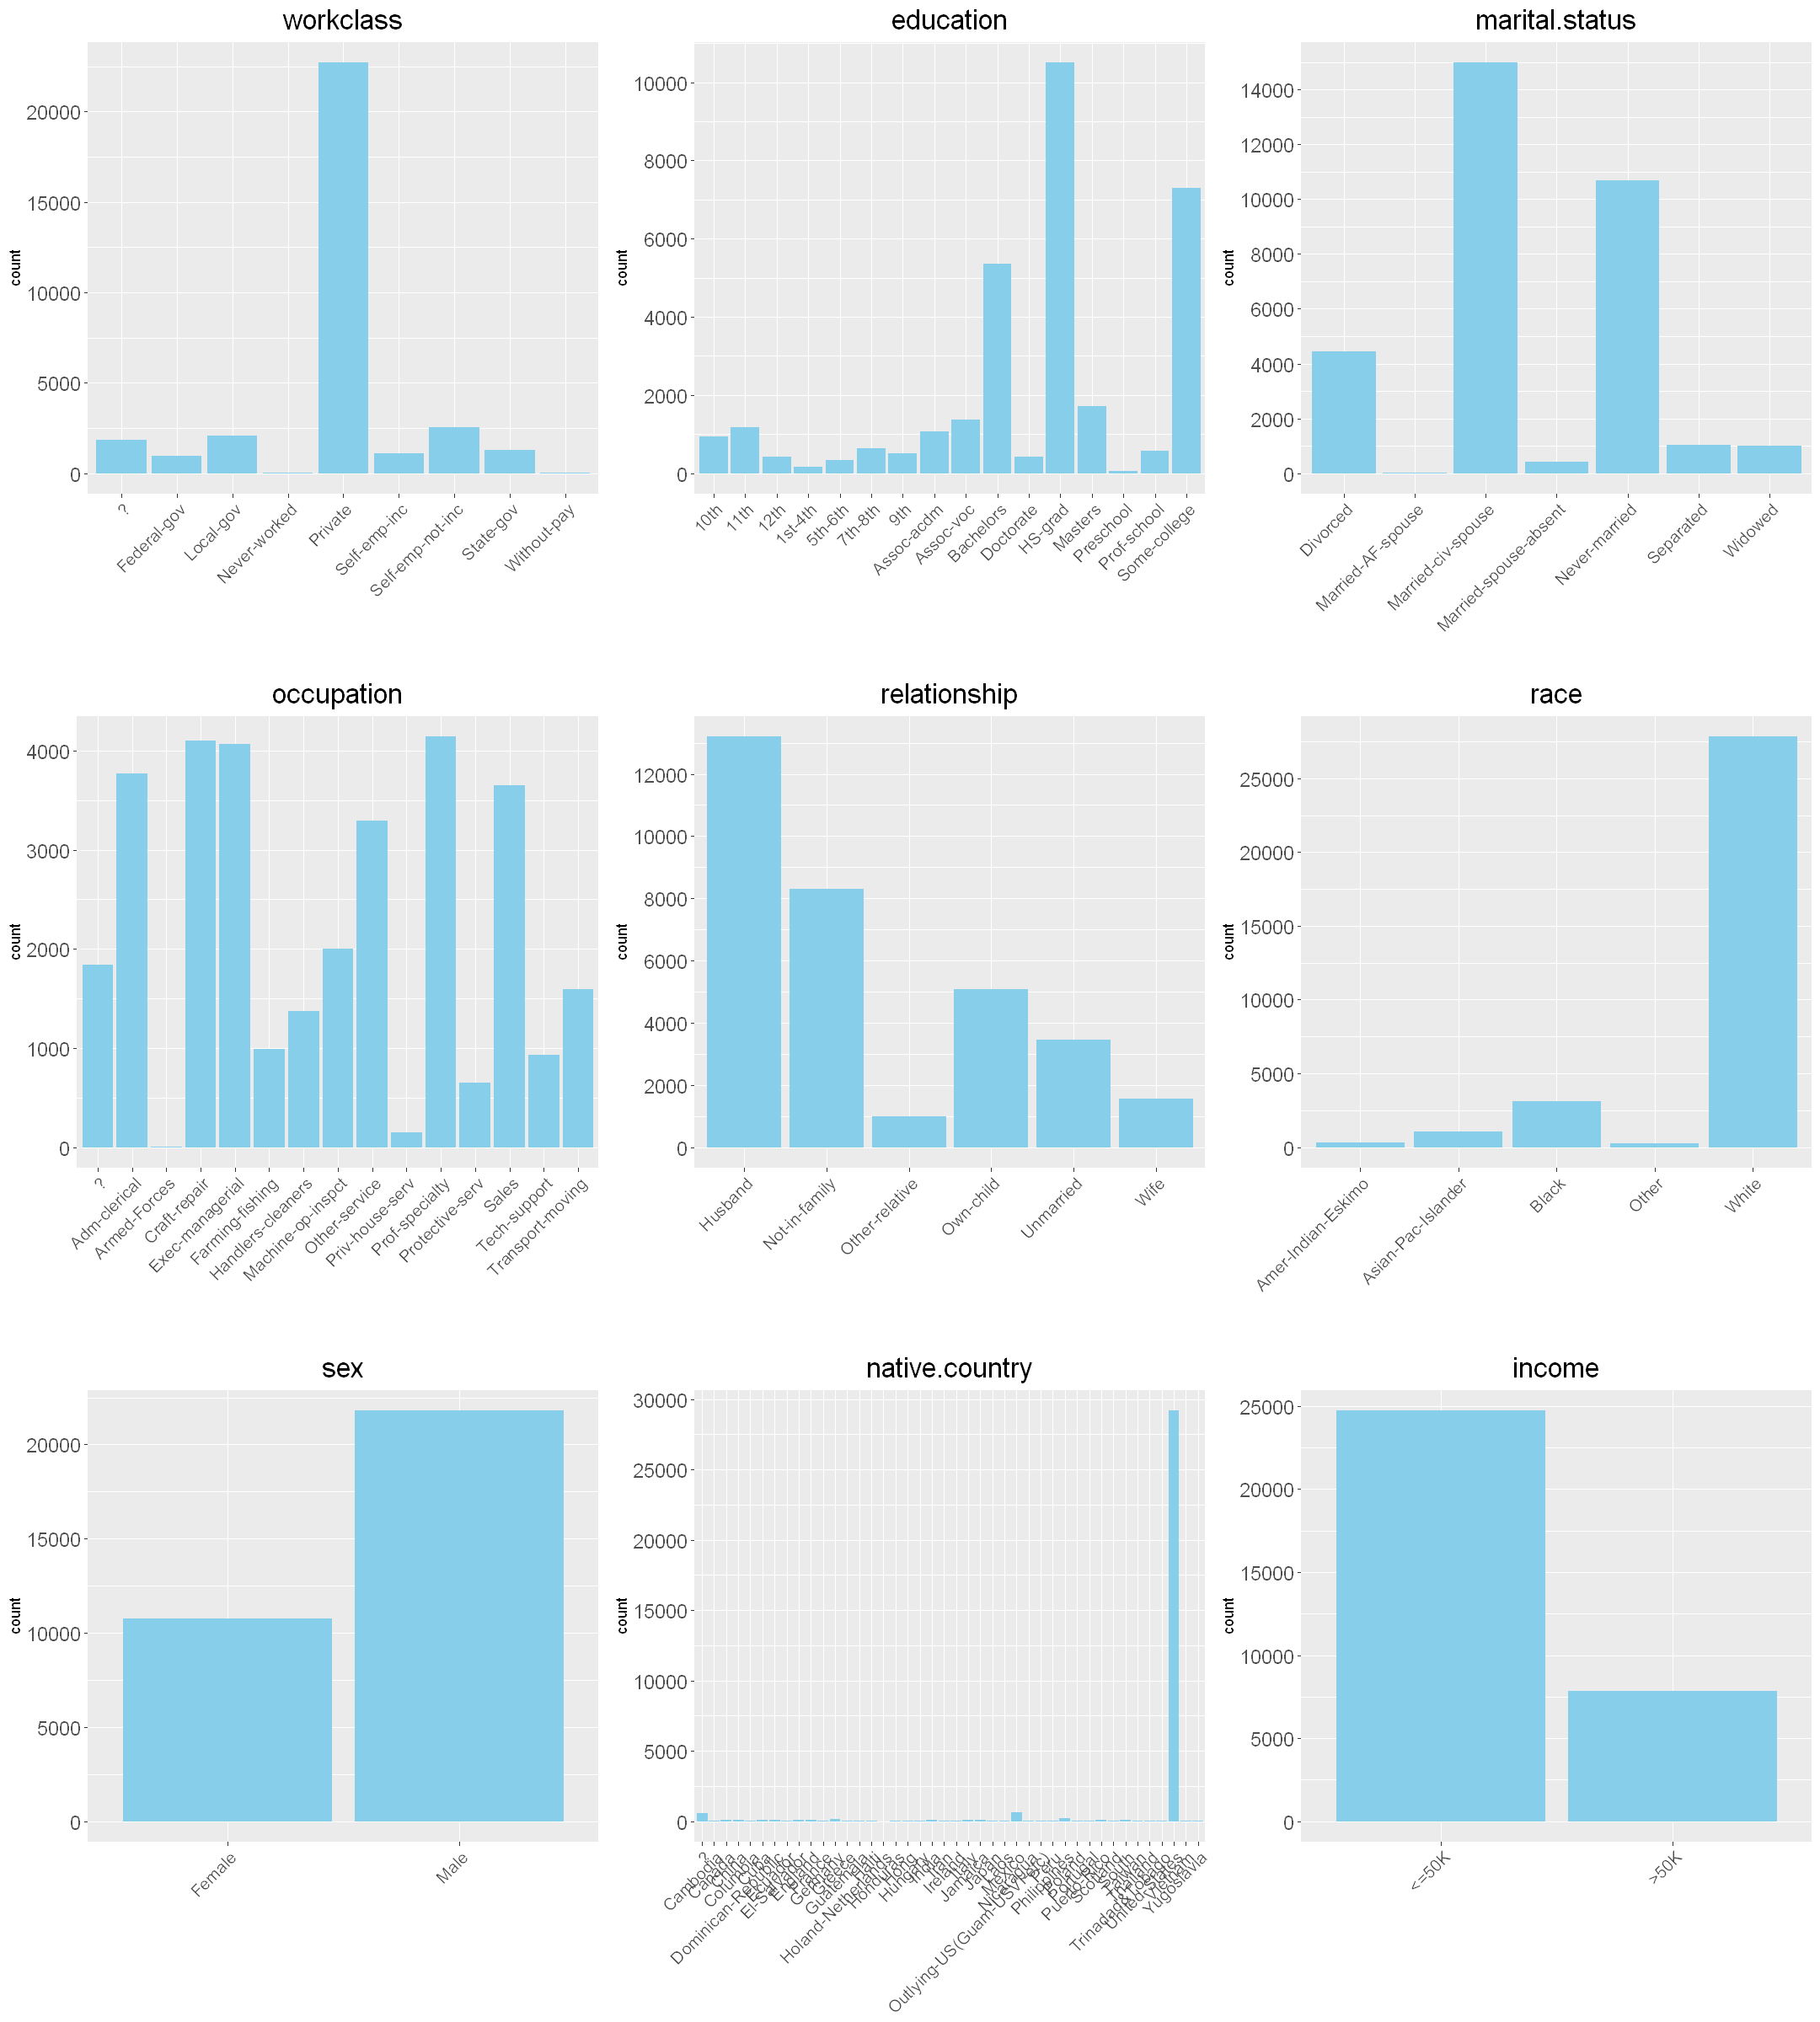

In [208]:
options(repr.plot.width=18, repr.plot.height=20)
plot_grid(plotlist = bar_plots, ncol = 3, align = "h")

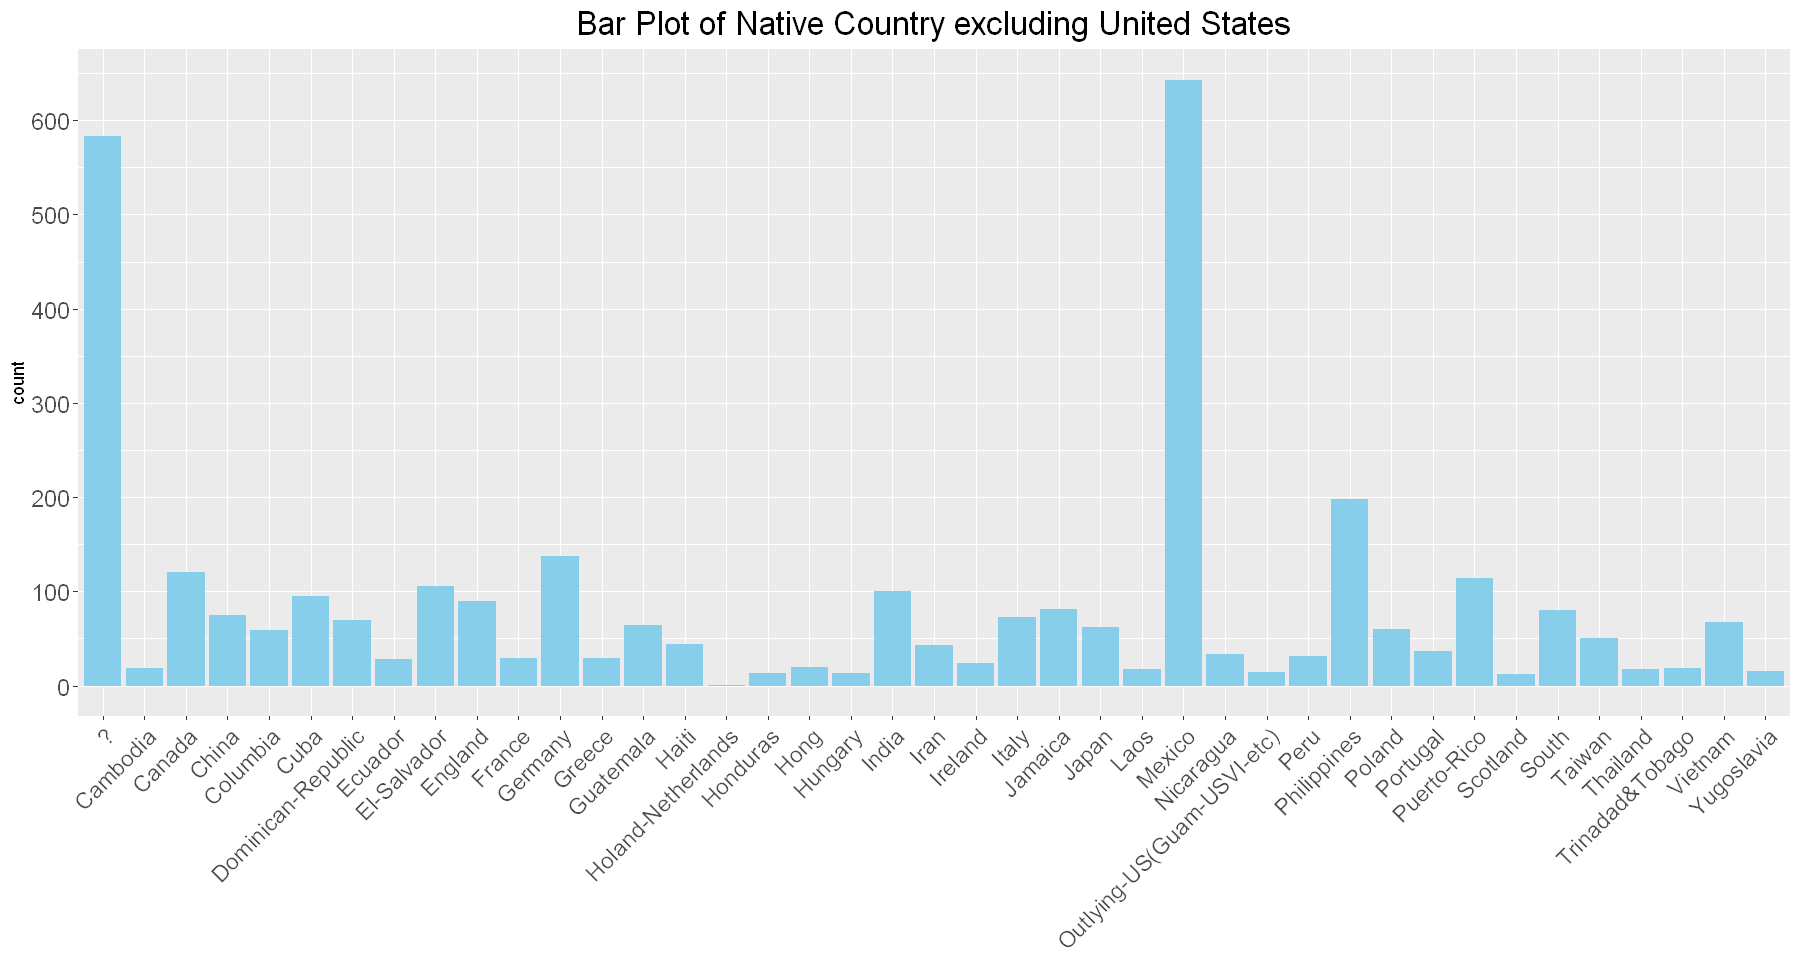

In [209]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(subset(adult_data, native.country != "United-States"), aes(x = native.country)) +
  geom_bar(fill='skyblue') +
  labs(title = "Bar Plot of Native Country excluding United States") +
  scale_y_continuous(breaks = pretty_breaks(n = 7)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=14),
        axis.text.y = element_text(size=14),
        axis.title.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=20))

#### Histograms

In [210]:
histograms <- lapply(numerical_columns, function(column) {
  ggplot(adult_data, aes_string(x = column)) +
    geom_histogram(bins = 30, fill = 'skyblue', color ='#476E7D', size = 0.6) +
    labs(title = column) +
    scale_y_continuous(breaks = pretty_breaks(n = 6)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size=14),
          axis.text.y = element_text(size=14),
          axis.title.x = element_blank(),
          plot.title = element_text(hjust = 0.5, size=20))
})

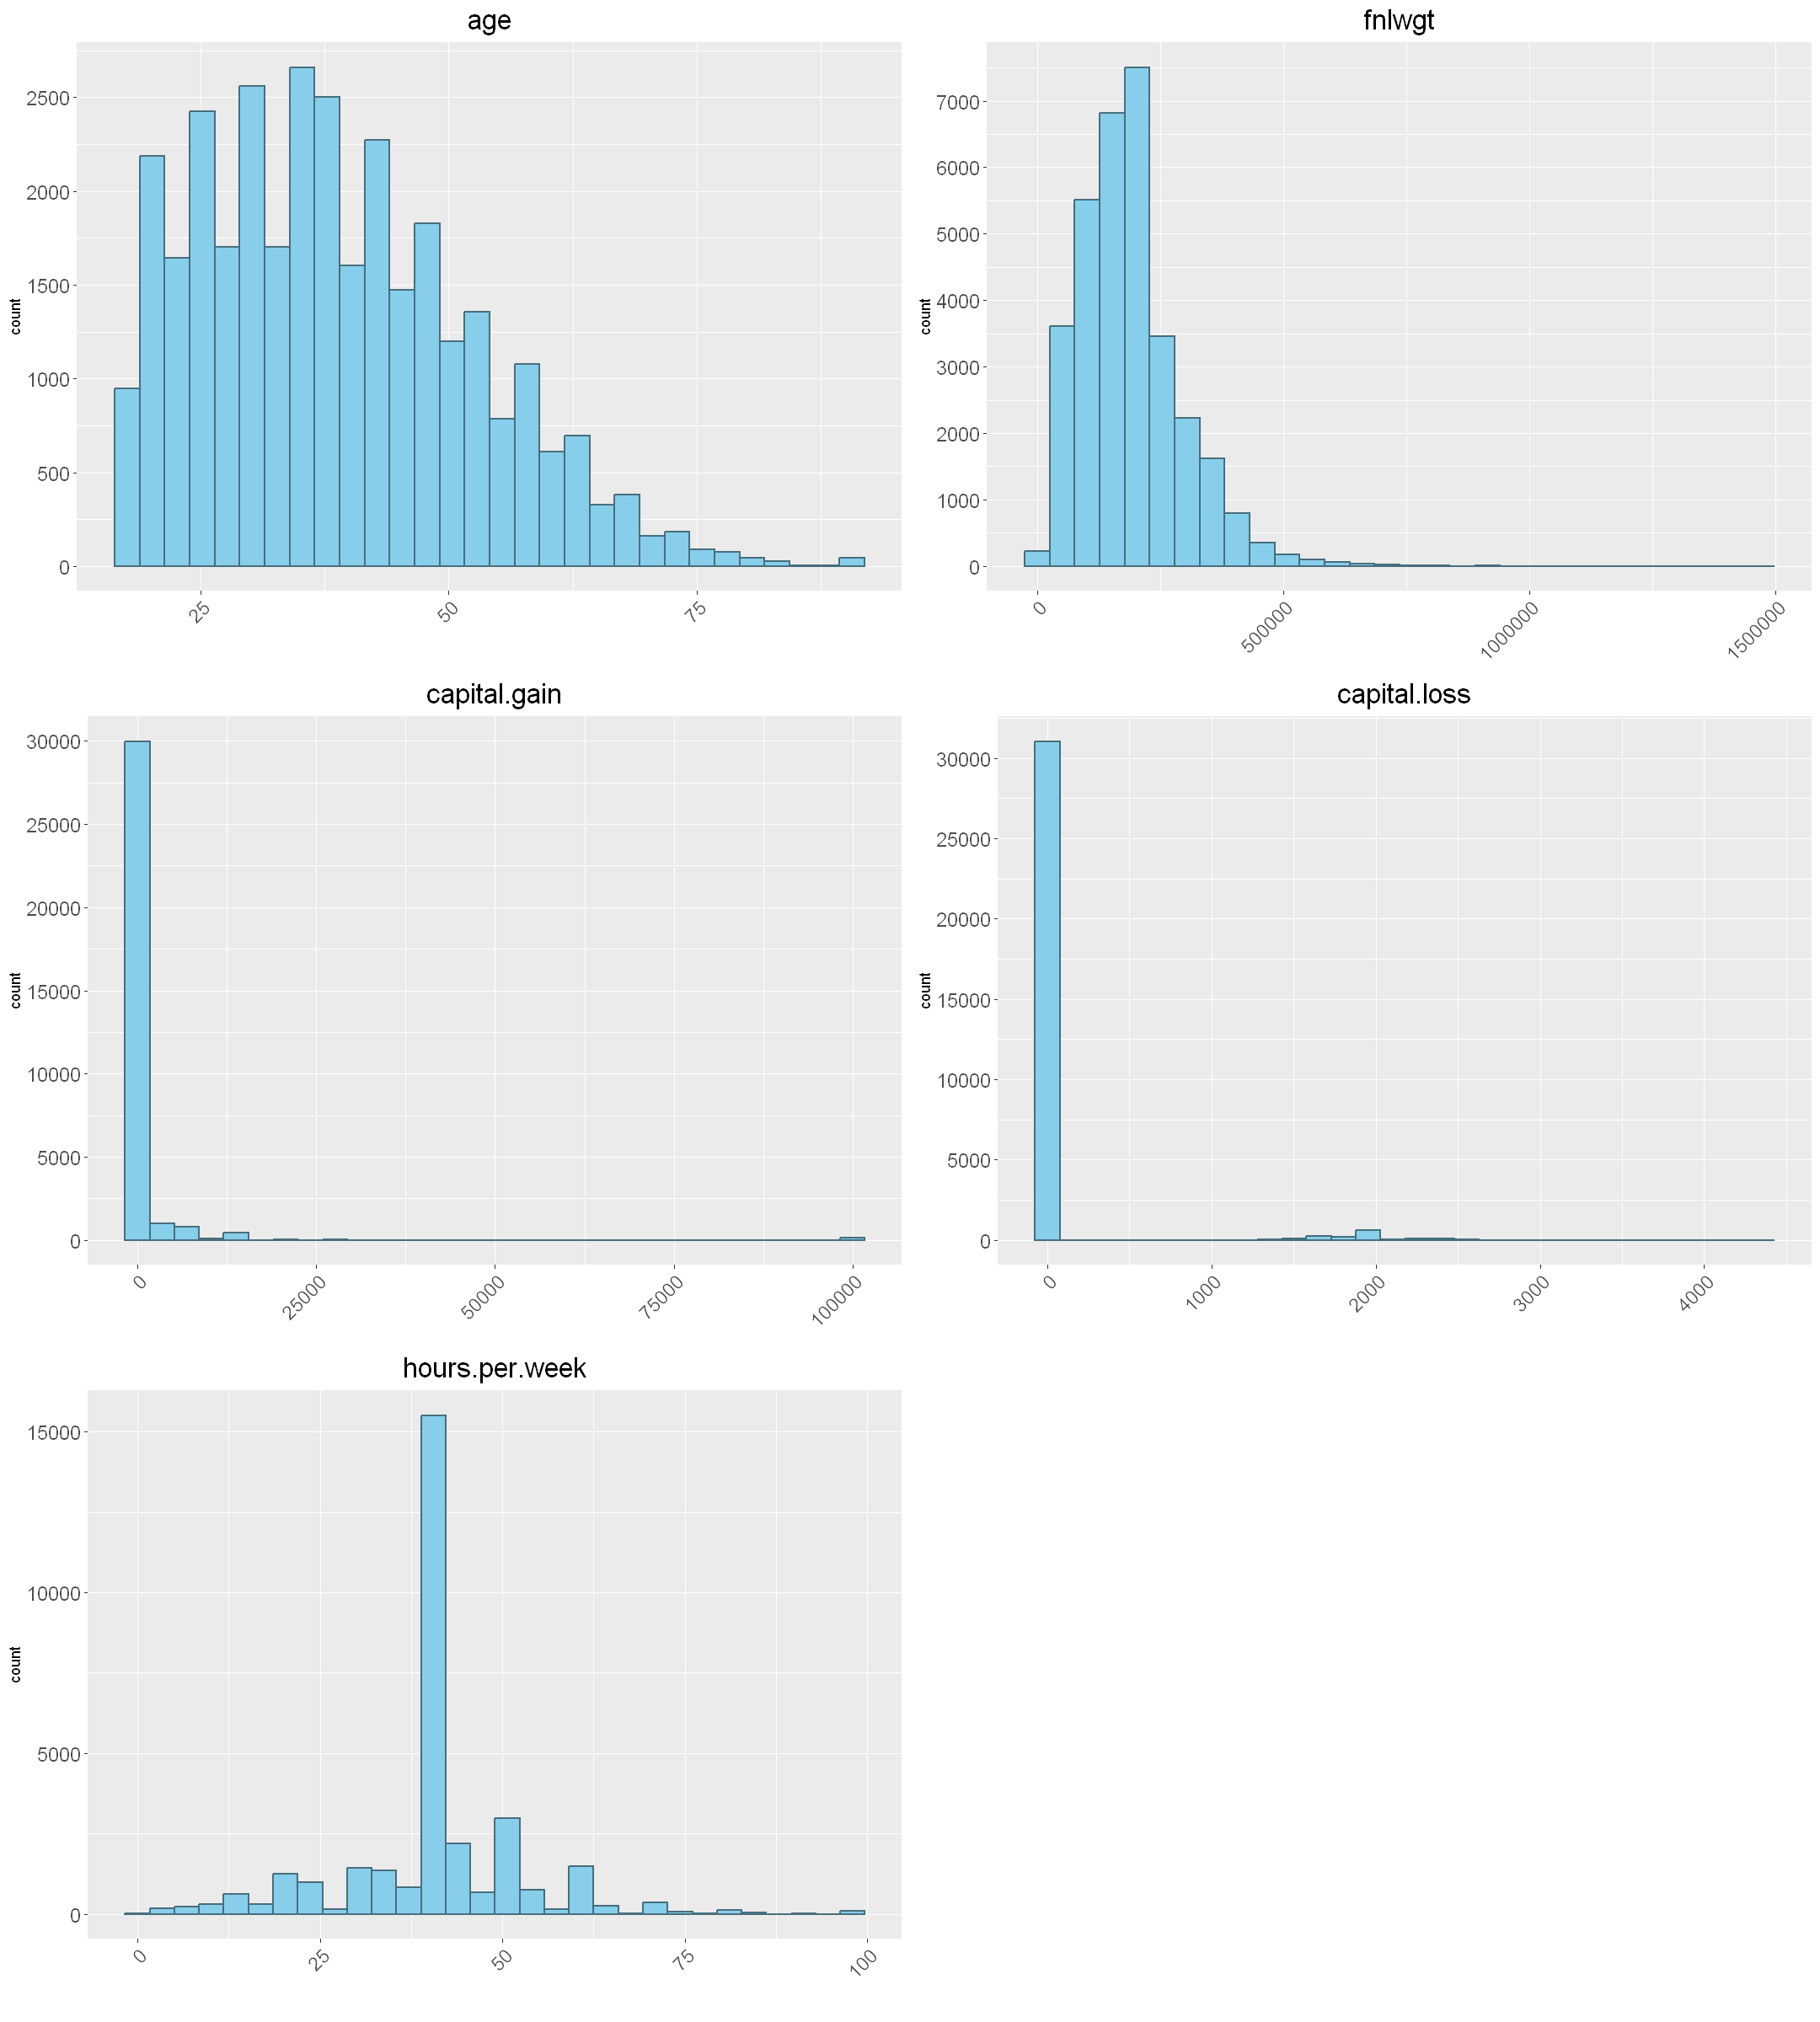

In [211]:
options(repr.plot.width=18, repr.plot.height=20)
plot_grid(plotlist = histograms, ncol = 2, align = "h")

#### Boxplots

In [212]:
boxplots <- lapply(c('age', 'fnlwgt', 'hours.per.week'), function(column) {
  ggplot(adult_data, aes_string(y = column)) +
    geom_boxplot(fill = "skyblue", color = "#476E7D") +
    labs(title = paste(column)) +
    scale_y_continuous(breaks = pretty_breaks(n = 10)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size=14),
          axis.text.y = element_text(size=14),
          axis.title.y = element_text(size=14),
          axis.title.x = element_blank(),
          plot.title = element_text(hjust = 0.5, size=20))
})

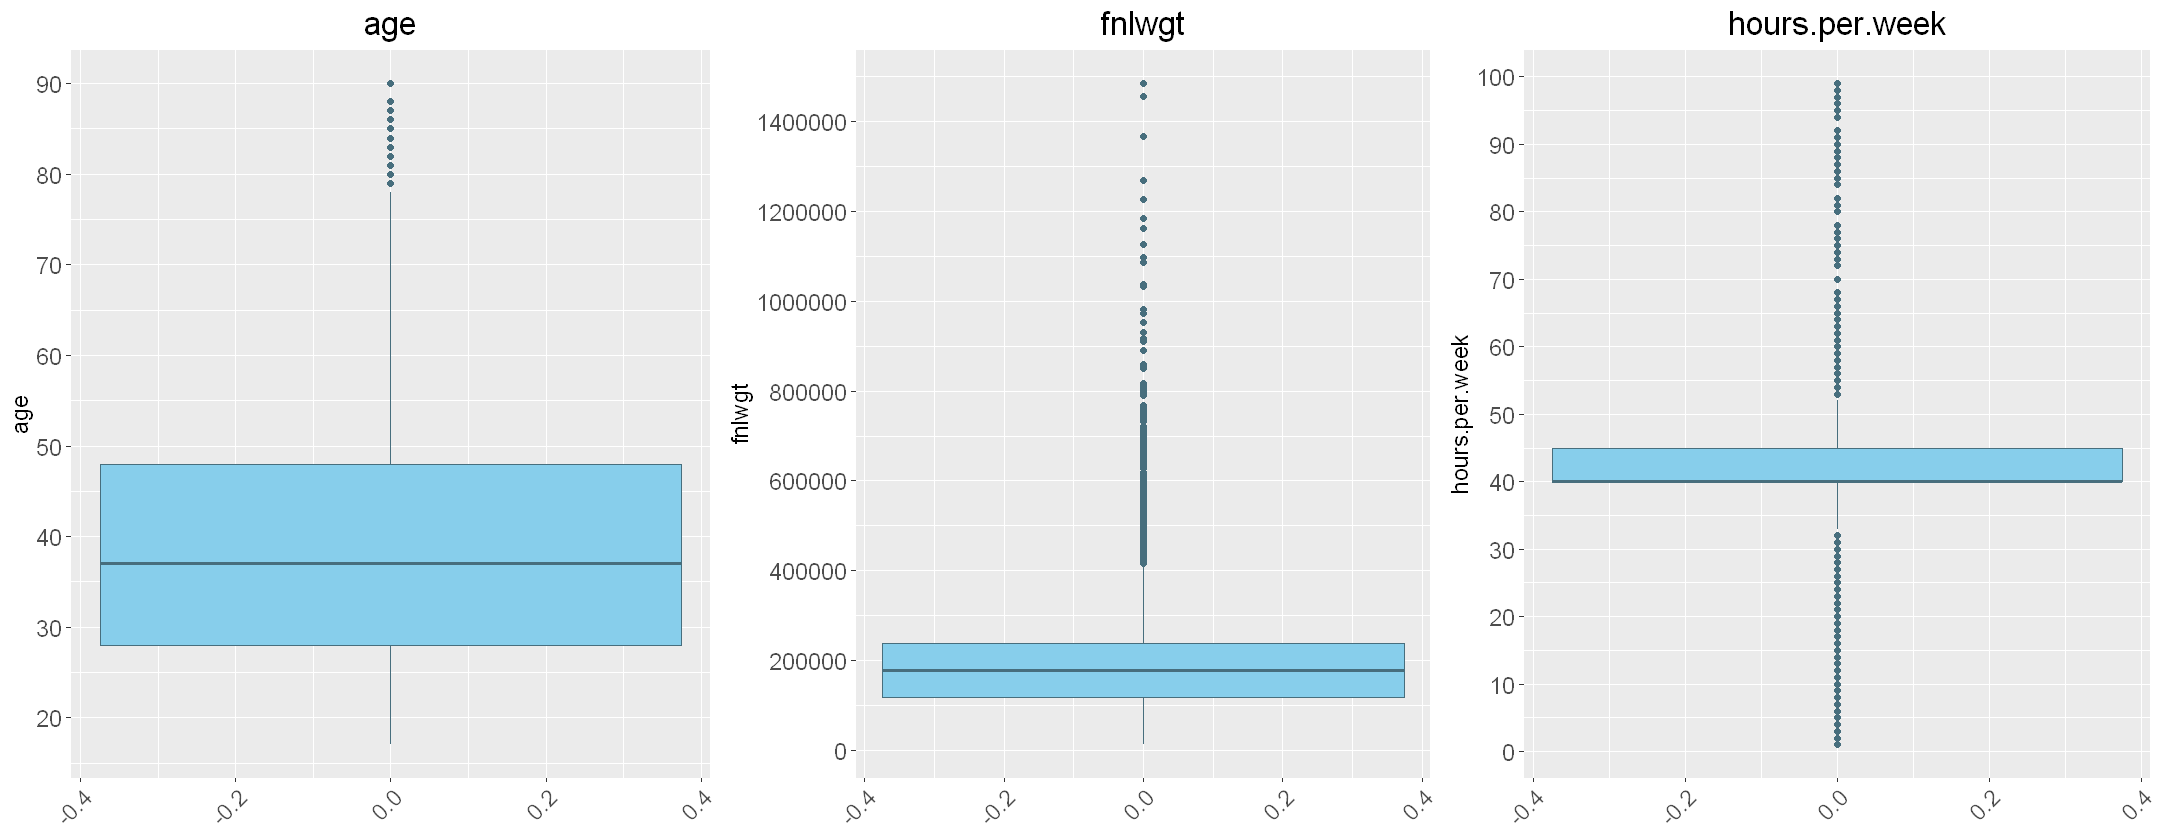

In [213]:
options(repr.plot.width=18, repr.plot.height=7)
plot_grid(plotlist = boxplots, ncol = 3, align = "h")

### Regarding income

## Missing values

In [214]:
sum(complete.cases(adult_data))

[1] 32560

In [215]:
columns_names_with_question <- names(adult_data)[sapply(adult_data, function(col) any(col == "?"))]
columns_names_with_question

[1] "workclass"      "occupation"     "native.country"

In [216]:
for (col_name in columns_names_with_question) {
  adult_data[[col_name]][adult_data[[col_name]] == "?"] <- NA
}

In [217]:
columns_with_na <- colSums(is.na(adult_data)) > 0
columns_with_na

age      workclass         fnlwgt      education marital.status 
         FALSE           TRUE          FALSE          FALSE          FALSE 
    occupation   relationship           race            sex   capital.gain 
          TRUE          FALSE          FALSE          FALSE          FALSE 
  capital.loss hours.per.week native.country         income 
         FALSE          FALSE           TRUE          FALSE

In [218]:
sum(is.na(adult_data))

[1] 4262

In [219]:
sum(is.na(adult_data$workclass))
sum(is.na(adult_data$occupation))
sum(is.na(adult_data$native.country))

[1] 1836

[1] 1843

[1] 583

In [220]:
missing_occupation <- round(sum(is.na(adult_data$occupation))/length(adult_data$occupation) * 100, 2)
missing_workclass <- round(sum(is.na(adult_data$workclass))/length(adult_data$workclass) * 100, 2)
missing_country <- round(sum(is.na(adult_data$native.country))/length(adult_data$native.country) * 100, 2)

occupation_data <- data.frame(Label = c("Missing", "Non-Missing"),
                           Value = c(missing_occupation, 100 - missing_occupation))
workclass_data <- data.frame(Label = c("Missing", "Non-Missing"),
                           Value = c(missing_workclass, 100 - missing_workclass)) 
country_data <- data.frame(Label = c("Missing", "Non-Missing"),
                           Value = c(missing_country, 100 - missing_country))

In [241]:
create_pie_chart <- function(df, title) {
    ggplot(df, aes(x="", y= Value, fill=Label)) +
    geom_bar(stat='identity', width=1) +
    coord_polar('y', start=0)+
    labs(title=title, fill="", x=NULL, y=NULL) +
    theme_void() +
    scale_fill_manual(values = c("Missing" = "salmon", "Non-Missing" = "skyblue")) +
    geom_text(aes(label = paste0(Value, "%")), position = position_stack(vjust = 0.5), size = 6) +
    theme(legend.position = c(0.15, 0.15),
          plot.title = element_text(hjust = 0.5, size=20),
          legend.text = element_text(size = 14))
}

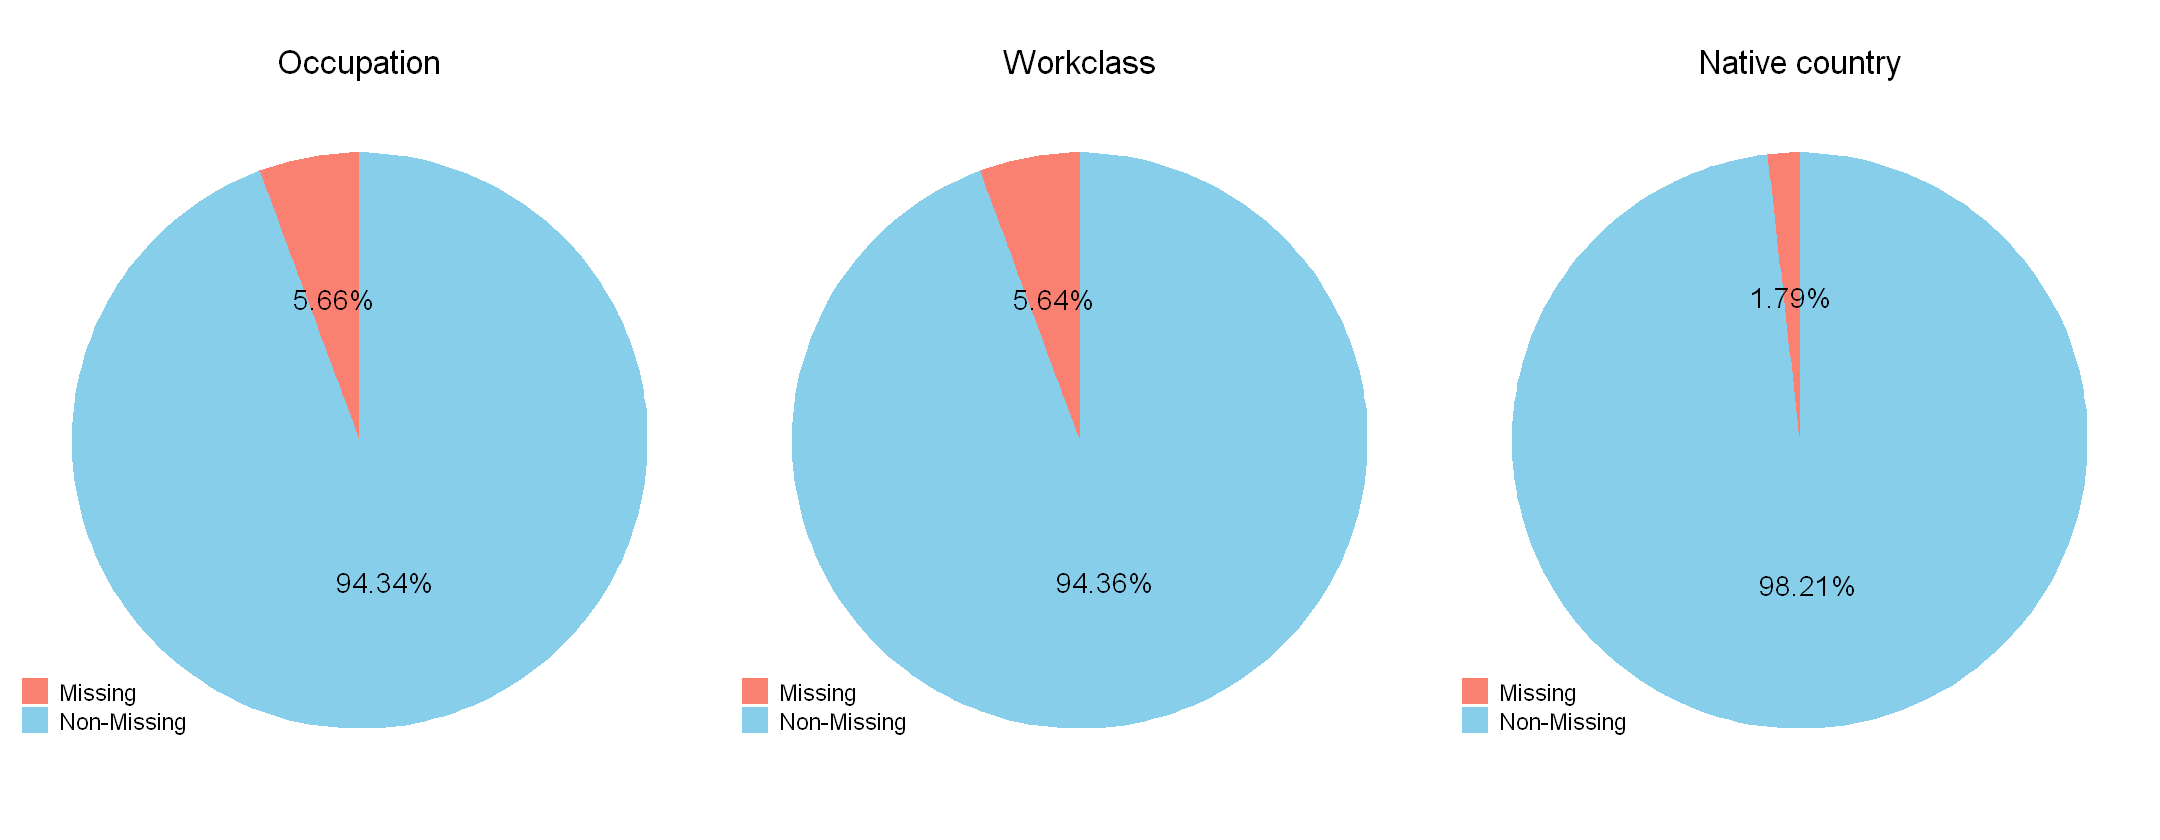

In [242]:
plot_grid(
  create_pie_chart(occupation_data, "Occupation"),
  create_pie_chart(workclass_data, "Workclass"),
  create_pie_chart(country_data, "Native country"),
  nrow = 1
)